Most frequently assigned rating: 4.0 with 27742 entries.


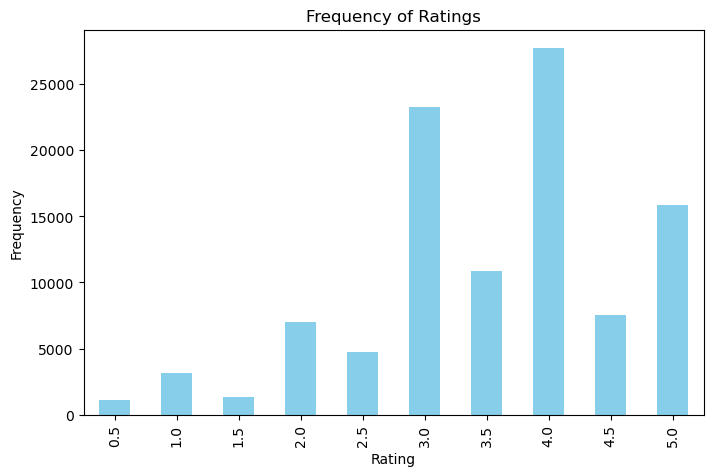

genres
Western            3.677542
Mystery            3.668295
TV Movie           3.654971
Crime              3.590487
Thriller           3.583901
Action             3.573938
Animation          3.571429
Romance            3.549848
Drama              3.543745
Science Fiction    3.541744
Comedy             3.539739
Foreign            3.538321
Fantasy            3.526614
War                3.515173
Adventure          3.511404
Horror             3.501077
Documentary        3.480940
Music              3.460067
History            3.448800
Family             3.393489
Name: rating, dtype: float64


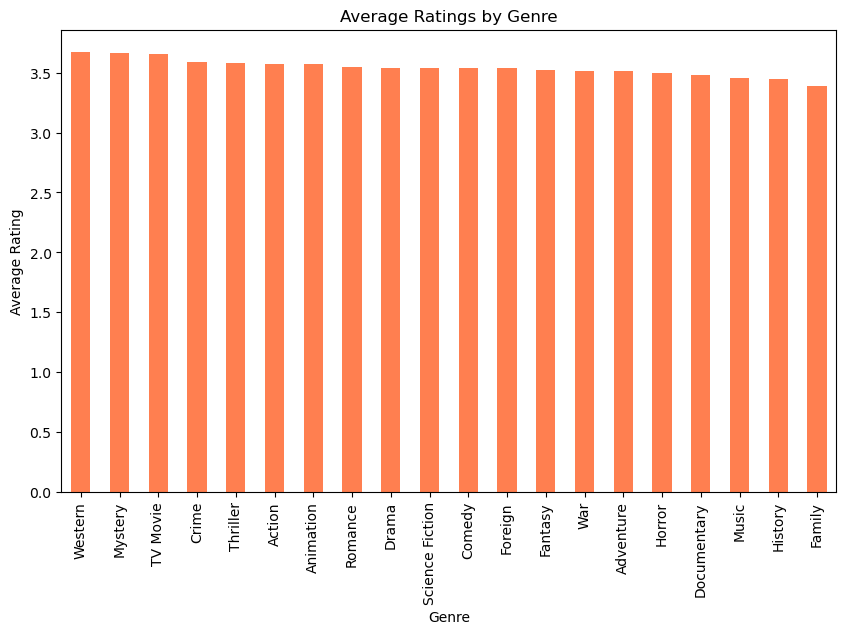

year
1996    3.550265
1997    3.474302
1998    3.693671
1999    3.592100
2000    3.607147
2001    3.609218
2002    3.594565
2003    3.443029
2004    3.328075
2005    3.437782
2006    3.520345
2007    3.404498
2008    3.568738
2009    3.521413
2010    3.606348
2011    3.537730
2012    3.524851
2013    3.413016
2014    3.577863
2015    3.659606
2016    3.761820
2017    3.511175
Name: rating, dtype: float64


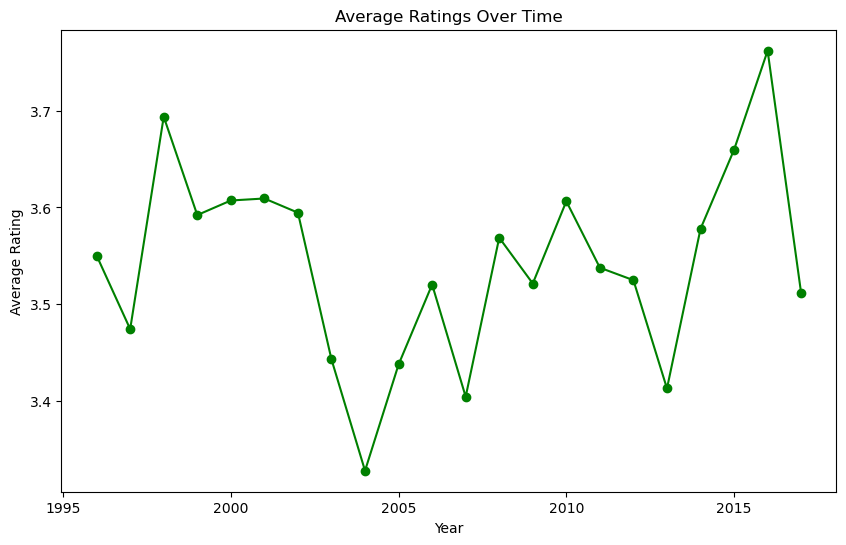

                                  title  average_rating  num_ratings
movieId                                                             
318            The Million Dollar Hotel        4.401489          873
1284     Torrente 2: Misión en Marbella        4.377193           57
858                Sleepless in Seattle        4.338798          549
1254     Je vais bien, ne t'en fais pas        4.298077           52
6016                     The Good Thief        4.248731          197


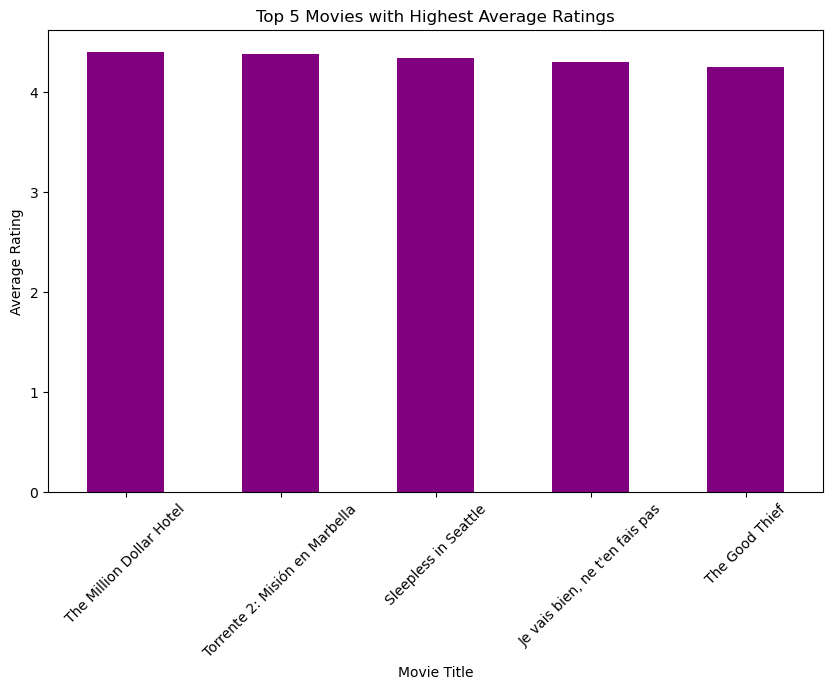

language
ta    5.000000
sr    4.333333
et    4.256098
bg    4.000000
ru    3.961838
bn    3.852941
xx    3.781250
hu    3.750000
is    3.750000
fa    3.727891
hi    3.714958
no    3.625000
ko    3.618297
fr    3.578148
en    3.557093
kk    3.541667
mn    3.535398
uk    3.500000
ka    3.500000
el    3.500000
de    3.491728
cn    3.489130
nl    3.471805
da    3.466203
ja    3.461674
zh    3.432343
sv    3.363724
es    3.320039
it    3.300000
tr    3.300000
pl    3.291935
pt    3.208333
he    3.205882
fi    3.203549
bs    3.175595
th    3.161392
ro    3.145833
zu    3.116477
te    3.045455
cs    2.997807
Name: rating, dtype: float64


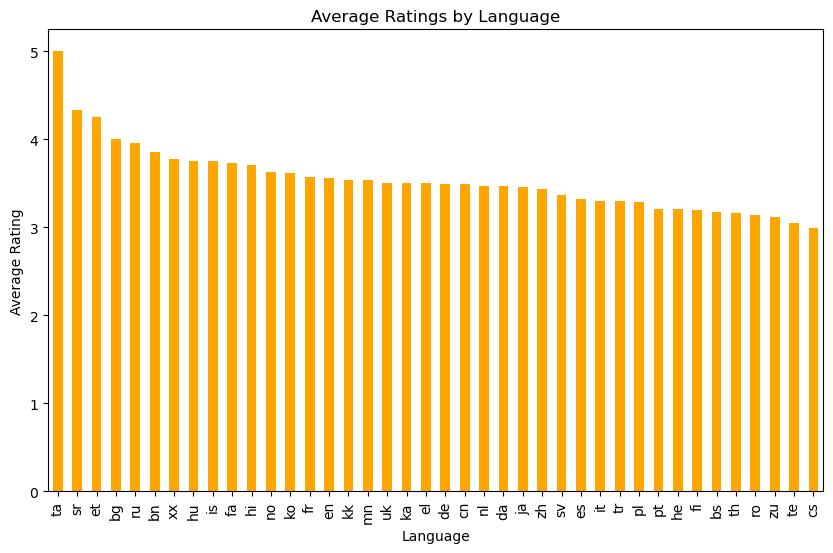

        average_rating  num_ratings rating_category
userId                                             
1             4.045455           11      Occasional
2             3.235294           17      Occasional
3             3.125000            8          Casual
4             3.652174           23      Occasional
5             4.200000           10          Casual


C:\Users\avkma\AppData\Local\Temp\ipykernel_6520\1376226338.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=user_ratings, palette='pastel')


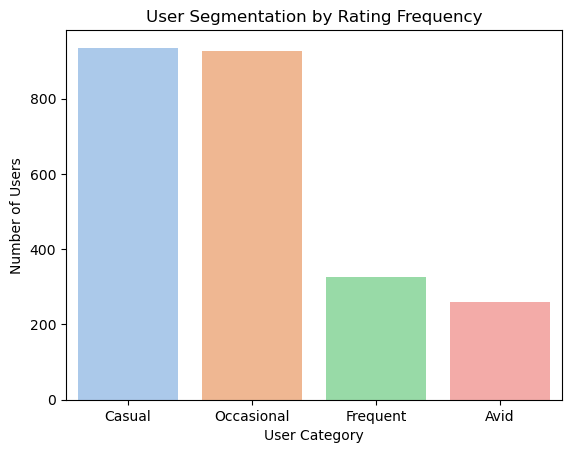

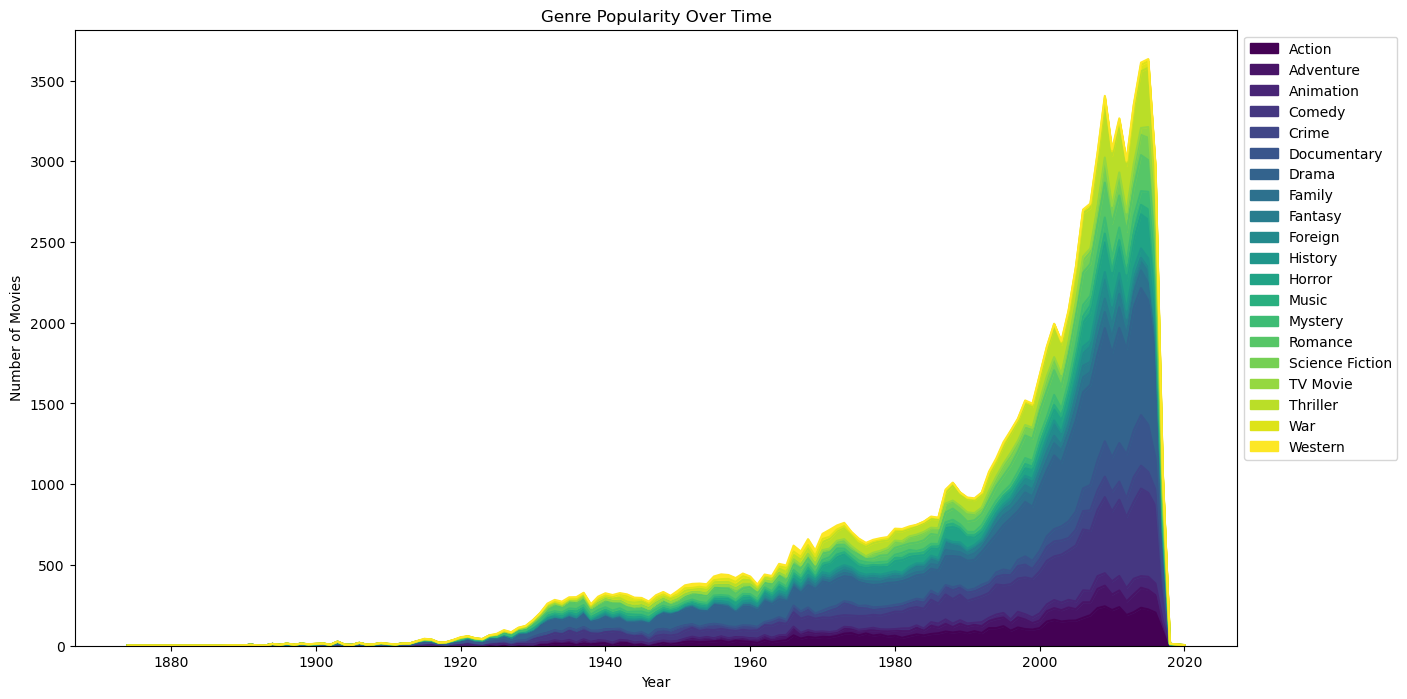

cluster
1    2449
2       1
0       1
3       1
Name: count, dtype: int64


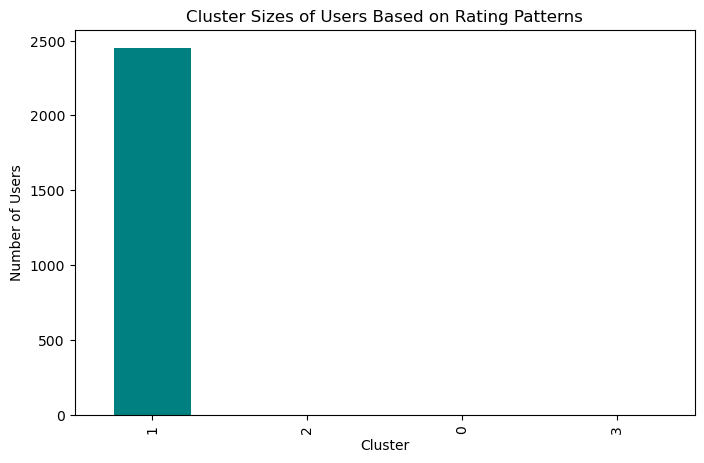

title
The Million Dollar Hotel              873
Terminator 3: Rise of the Machines    824
Солярис                               791
The 39 Steps                          722
Monsoon Wedding                       718
Once Were Warriors                    623
Trois couleurs : Rouge                605
License to Wed                        582
5 Card Stud                           563
La passion de Jeanne d'Arc            562
dtype: int64


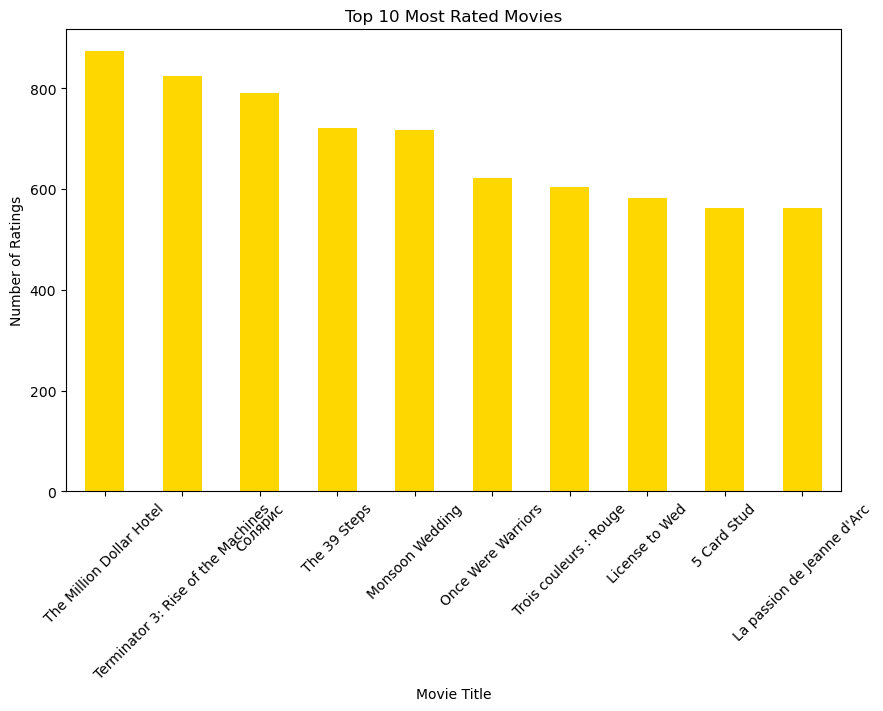

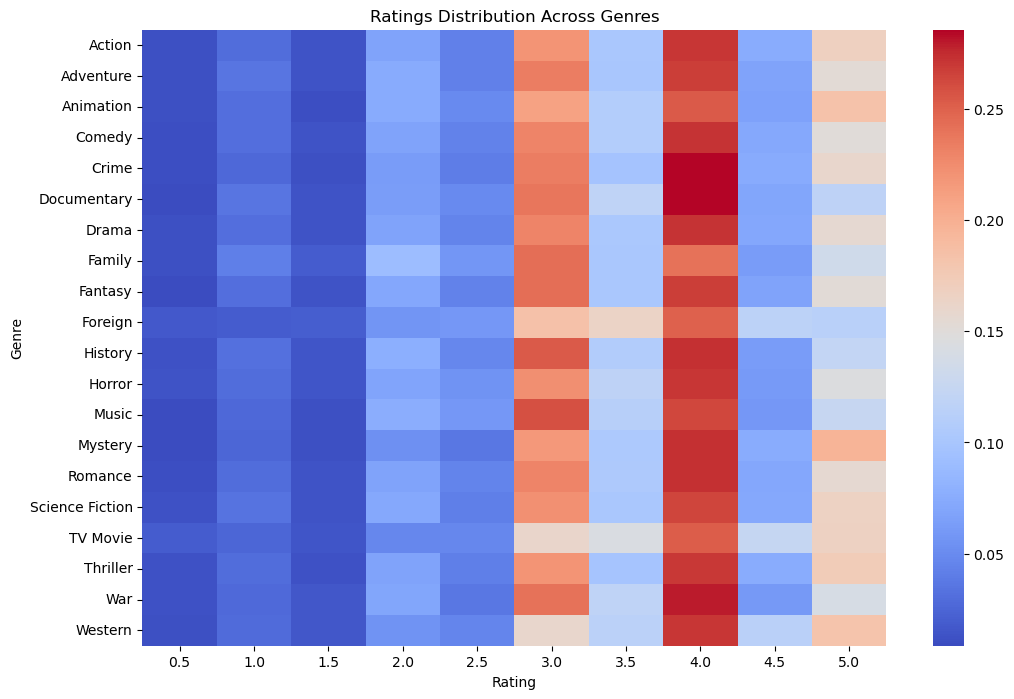

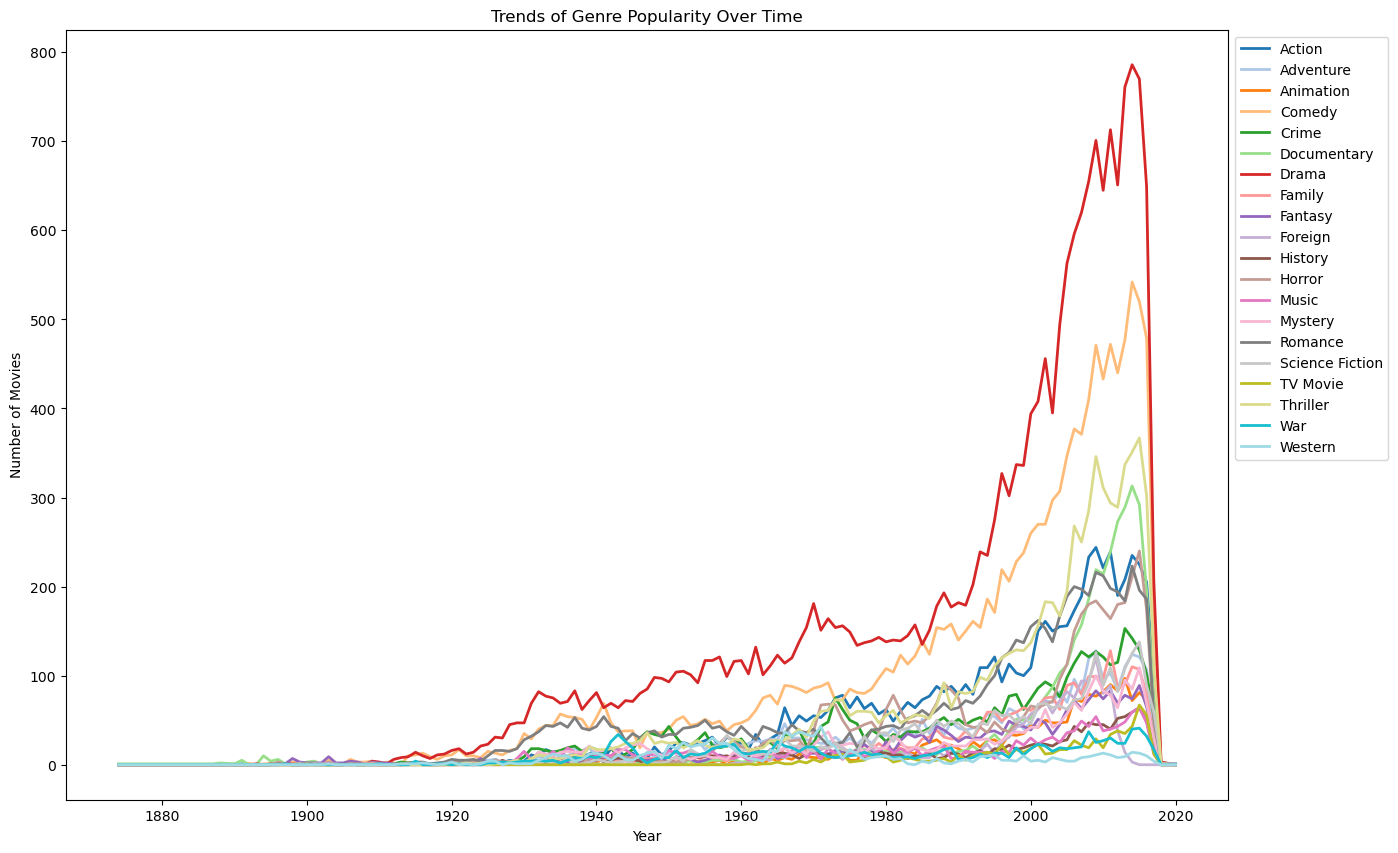

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the datasets
movies = pd.read_json('movies.json', lines=True)
ratings = pd.read_csv('ratings.csv')

# Ensure proper column merging
ratings['movieId'] = ratings['movieId'].astype(str)
movies['id'] = movies['id'].astype(str)
merged = pd.merge(ratings, movies, left_on='movieId', right_on='id')

### 1. Most Frequently Assigned Rating ###

# Frequency of each rating
rating_counts = ratings['rating'].value_counts()
most_frequent_rating = rating_counts.idxmax()
num_entries = rating_counts.max()

print(f"Most frequently assigned rating: {most_frequent_rating} with {num_entries} entries.")

# Visualization
plt.figure(figsize=(8, 5))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### 2. Average Rating by Genre ###

# Explode genres to handle movies with multiple genres
genre_data = merged.explode('genres')

# Group by genre and calculate mean rating
genre_ratings = genre_data.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(genre_ratings)

# Visualization
genre_ratings.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Average Ratings by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.show()

### 3. Temporal Analysis of Ratings ###

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

# Ratings over time
yearly_ratings = ratings.groupby('year')['rating'].mean()

print(yearly_ratings)

# Visualization
yearly_ratings.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Average Ratings Over Time')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

### 4. Top 5 Movies with Highest Average Ratings ###

# Filter for movies with at least 50 ratings
movie_ratings = merged.groupby('movieId').agg({
    'rating': ['mean', 'count'],
    'title': 'first'
})
movie_ratings.columns = ['average_rating', 'num_ratings', 'title']
top_movies = movie_ratings[movie_ratings['num_ratings'] >= 50].sort_values('average_rating', ascending=False).head(5)

print(top_movies[['title', 'average_rating', 'num_ratings']])

# Visualization
top_movies.plot(kind='bar', x='title', y='average_rating', color='purple', legend=False, figsize=(10, 6))
plt.title('Top 5 Movies with Highest Average Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Movie Title')
plt.xticks(rotation=45)
plt.show()

### 5. Ratings by Language ###

# Average rating by language
language_ratings = merged.groupby('language')['rating'].mean().sort_values(ascending=False)
print(language_ratings)

# Visualization
language_ratings.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Average Ratings by Language')
plt.ylabel('Average Rating')
plt.xlabel('Language')
plt.show()

### 6. User Behavior Analysis ###

# Average ratings by user
user_ratings = ratings.groupby('userId').agg({
    'rating': ['mean', 'count']
})
user_ratings.columns = ['average_rating', 'num_ratings']

# User segmentation based on number of ratings
user_ratings['rating_category'] = pd.cut(user_ratings['num_ratings'], bins=[0, 10, 50, 100, 500],
                                         labels=['Casual', 'Occasional', 'Frequent', 'Avid'])
print(user_ratings.head())

# Visualization
sns.countplot(x='rating_category', data=user_ratings, palette='pastel')
plt.title('User Segmentation by Rating Frequency')
plt.xlabel('User Category')
plt.ylabel('Number of Users')
plt.show()

### 7. Genre Popularity by Year ###

# Extract release year from release date
movies['release_year'] = pd.to_datetime(movies['releasedate']).dt.year
release_genre_data = movies.explode('genres')

genre_popularity = release_genre_data.groupby(['release_year', 'genres']).size().unstack().fillna(0)
genre_popularity.plot(kind='area', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Genre Popularity Over Time')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 8. Clustering Users by Rating Behavior ###

# Prepare user-movie rating matrix
user_movie_matrix = merged.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_movie_matrix)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
user_movie_matrix['cluster'] = kmeans.labels_

print(user_movie_matrix['cluster'].value_counts())

# Visualization of cluster sizes
user_movie_matrix['cluster'].value_counts().plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Cluster Sizes of Users Based on Rating Patterns')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

### 9. Most Rated Movies ###

# Movies with the most number of ratings
most_rated_movies = merged.groupby('title').size().sort_values(ascending=False).head(10)
print(most_rated_movies)

# Visualization
most_rated_movies.plot(kind='bar', figsize=(10, 6), color='gold')
plt.title('Top 10 Most Rated Movies')
plt.ylabel('Number of Ratings')
plt.xlabel('Movie Title')
plt.xticks(rotation=45)
plt.show()

### 10. Ratings Distribution by Genres ###

# Ratings distribution for each genre
genre_rating_dist = genre_data.groupby('genres')['rating'].value_counts(normalize=True).unstack().fillna(0)

# Heatmap of ratings distribution
plt.figure(figsize=(12, 8))
sns.heatmap(genre_rating_dist, cmap='coolwarm', annot=False, cbar=True)
plt.title('Ratings Distribution Across Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

### 11. Temporal Analysis of Genre Popularity ###

# Group by release year and genres
genre_trends = release_genre_data.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Visualization of genre trends
genre_trends.plot(figsize=(15, 10), colormap='tab20', linewidth=2)
plt.title('Trends of Genre Popularity Over Time')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Summary ###
# This script now includes additional analysis and visualizations to explore various aspects of the dataset. 
# New sections include most rated movies, ratings distribution by genres, and temporal genre analysis.
# Use this as a comprehensive tool for analyzing movie data and improving insights for your GitHub project.
